0.8101189189000664


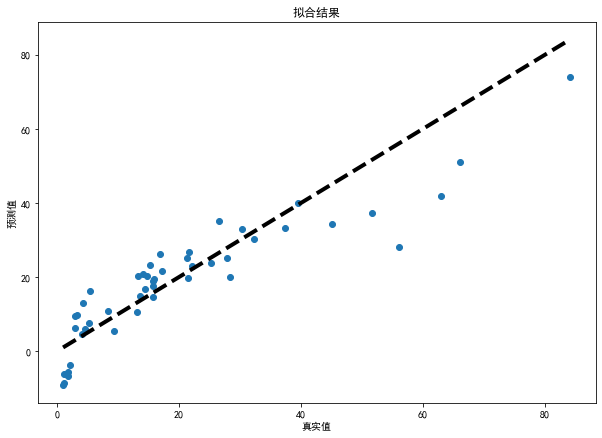

In [1]:
# import the libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use({'figure.figsize':(10,7)})
plt.rcParams['axes.unicode_minus']=False
plt.rcParams['font.sans-serif']=['SimHei']
#import the dataset
d33=pd.read_csv('E:/yadian.csv')  #读取数据集
x=d33[['取向因子y','取向因子x',' PZT体积分数','聚集高度y','聚集高度x','界面平行因子','最短路径','通道因子','颗粒平均高度','竖向因子','取向因子']]
y=d33['d33']

#Feature scaling the independent variable
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()#对数据进行归一化处理
x = sc_X.fit_transform(x) 

#splitting the data into train and test
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.1 , random_state = 42)

#importing the linear regression models(using SGD)
from sklearn.linear_model import SGDRegressor

# Creating the object instance for SGD(Stochastic Gradient Descent)
regressor = SGDRegressor(max_iter=10000, tol=1e-3, alpha =0.01, random_state = 0, learning_rate = 'invscaling' , eta0 = 0.0001)
regressor.fit(x_train, y_train)

#Predicting the output for our SGD Linear Model with the test set
y_pred2 = regressor.predict(x_test)

# Now lets calculate the Coefficient of Determination
from sklearn.metrics import r2_score, mean_squared_error

r_squared = r2_score(y_test, y_pred2)
print(r_squared)
plt.xlabel("真实值")
plt.ylabel("预测值")
plt.title("拟合结果")
plt.scatter(y_test, y_pred2)
plt.plot([y_test.min(),y_test.max()],[y_test.min(),y_test.max()],'k--',lw=4,label='predicted')